In [53]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
datapath = 'Data/cell_images/training_set/BW/'

(-0.5, 59.5, 33.5, -0.5)

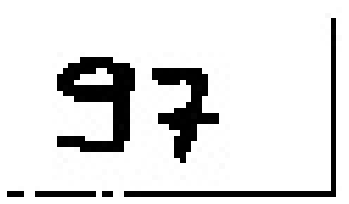

In [78]:
image = cv2.imread(os.path.join(datapath, 'clean1.jpg'))
plt.imshow(image)
plt.axis('off')

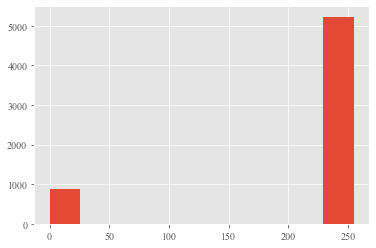

In [80]:
import numpy as np
plt.hist(image.flatten())
plt.show()

In [5]:
import lib.dataloader
from Model.Predictor_Parallel import Predictor

/Users/HarveyYan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
BATCH_SIZE = 200
N_EMB = 3 # 3 channels for augmented images
DEVICES = ['/cpu:0']
digits_limits = 8

# defining the hyperparameters
HParams = ['arch', 'use_bn', 'use_lstm', 'nb_layers', 'filter_size', 'output_dim',
           'learning_rate', 'use_clr', 'use_momentum', 'length_obj_ratio']

arch = 1
use_bn = True
use_lstm = True
nb_layers = 8
filter_size = 3
output_dim = 16
learning_rate = 2e-4
use_clr = True
use_momentum = False
length_obj_ratio = 0.

hp = {}
for param in HParams:
    hp[param] = eval(param)
    
lib.dataloader.digits_limit = digits_limits
lib.dataloader.nb_channels = N_EMB

In [7]:
dataset = lib.dataloader.load_ocr_dataset()

dataset size 7497
training set 6748
test set 749


(34, 84, 3)


(-0.5, 83.5, 33.5, -0.5)

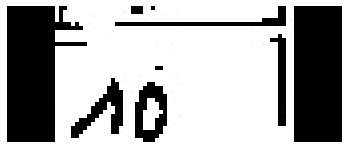

In [69]:
print(dataset['train_images'][100].shape)
plt.imshow(dataset['train_images'][100], cmap='gray')
plt.axis('off')

In [9]:
dataset['train_ids'][100]

'533.jpg'

In [10]:
dataset['train_targets'][100]

array([ 1,  0, 12, 12, 12, 12, 12, 12])

In [11]:
[lib.dataloader.all_allowed_characters[idx] for idx in dataset['train_targets'][100]]

['1', '0', '!', '!', '!', '!', '!', '!']

In [12]:
DEVICES

['/cpu:0']

In [13]:
N_CLASS = len(lib.dataloader.all_allowed_characters)
model = Predictor(lib.dataloader.max_size, N_EMB, N_CLASS,
                      lib.dataloader.max_target_length, lib.dataloader.digits_limit, DEVICES, **hp)

hidden units in the decoder 512, same as the encoder
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

hidden units in the decoder 512, same as the encoder
Predictor arch 1 Params:
	Classifier/pretrain_effect_zone/Shortcut/filters:0 (1,1,3,16)
	Classifier/pretrain_effect_zone/Shortcut/bias:0 (16)
	Classifier/pretrain_effect_zone/Conv1/filters:0 (3,3,3,16)
	Classifier/pretrain_effect_zone/Conv1/bias:0 (16)
	Classifier/pretrain_effect_zone/Conv2/filters:0 (3,3,16,16)
	Classifier/pretrain_effect_zone/Conv2/bias:0 (16)
	Classifier/pretrain_effect_zone/ResBlock1/Shortcut/filters:0 (1,1,16,32)
	Classifier/pretrain_effect_zone/ResBlock1/Shortcut/bias:0 (32)
	Classifier/pretrain_effect_zone/ResBlock1/Norm1/BN/beta:0 (16)
	Classifier/pretrain_effect_zone/ResBlock1/Conv1/filters:0 (3,3,16,16)
	Classifier/pretrain_effect_zone/ResBlock1/Conv1/bias:0 (16)
	Cla

In [14]:
chkp_path = 'output/20190615-224347-3-channels-corrected-nolength-86%/checkpoints/-3041'

In [15]:
model.load(chkp_path)

INFO:tensorflow:Restoring parameters from output/20190615-224347-3-channels-corrected-nolength-86%/checkpoints/-3041


# Now let's do some model surgery 

In [16]:
import tensorflow as tf

In [17]:
# get encoder output
for op in model.g.get_operations():
    print(op.name)

Placeholder
Const
split/split_dim
split
Placeholder_1
Placeholder_2
one_hot/on_value
one_hot/off_value
one_hot/depth
one_hot
Const_1
split_1/split_dim
split_1
Placeholder_3
one_hot_1/on_value
one_hot_1/off_value
one_hot_1/depth
one_hot_1
Const_2
split_2/split_dim
split_2
Placeholder_4
one_hot_2/on_value
one_hot_2/off_value
one_hot_2/depth
one_hot_2
Const_3
split_3/split_dim
split_3
Placeholder_5
Placeholder_6
Placeholder_7
CyclicLearningRate/learning_rate
CyclicLearningRate/Cast
CyclicLearningRate/Cast_1
CyclicLearningRate/Mul/x
CyclicLearningRate/Mul
CyclicLearningRate/truediv
CyclicLearningRate/Add/x
CyclicLearningRate/Add
CyclicLearningRate/Floor
CyclicLearningRate/Mul_1/x
CyclicLearningRate/Mul_1
CyclicLearningRate/truediv_1
CyclicLearningRate/Sub
CyclicLearningRate/Add_1/x
CyclicLearningRate/Add_1
CyclicLearningRate/Abs
CyclicLearningRate/Sub_1/x
CyclicLearningRate/Sub_1
CyclicLearningRate/Maximum/x
CyclicLearningRate/Maximum
CyclicLearningRate/Sub_2/x
CyclicLearningRate/Sub_2
Cyc

Classifier/gradients/Classifier/Encoder/while/Exit_3_grad/b_exit
Classifier/gradients/Classifier/Encoder/while/Exit_5_grad/b_exit
Classifier/gradients/Classifier/Encoder/while/Exit_4_grad/b_exit
Classifier/gradients/Classifier/Encoder/while/Exit_6_grad/b_exit
Classifier/gradients/Classifier/Encoder/while/Exit_1_grad/b_exit
Classifier/gradients/Classifier/Encoder/while/Exit_2_grad/b_exit
Classifier/gradients/AddN_4
Classifier/gradients/Classifier/Decoder/while/decoder_lstm_cell/add_1_grad/Shape
Classifier/gradients/Classifier/Decoder/while/decoder_lstm_cell/add_1_grad/Shape_1
Classifier/gradients/Classifier/Decoder/while/decoder_lstm_cell/add_1_grad/BroadcastGradientArgs
Classifier/gradients/Classifier/Decoder/while/decoder_lstm_cell/add_1_grad/BroadcastGradientArgs/Const
Classifier/gradients/Classifier/Decoder/while/decoder_lstm_cell/add_1_grad/BroadcastGradientArgs/f_acc
Classifier/gradients/Classifier/Decoder/while/decoder_lstm_cell/add_1_grad/BroadcastGradientArgs/Enter
Classifier/g

Classifier/gradients/Switch_84
Classifier/gradients/Identity_80
Classifier/gradients/Shape_81
Classifier/gradients/zeros_81/Const
Classifier/gradients/zeros_81
Classifier/gradients/Classifier/pretrain_effect_zone/ResBlock1/Norm1/BN/cond/FusedBatchNorm_1/Switch_grad/cond_grad
Classifier/gradients/Switch_85
Classifier/gradients/Identity_81
Classifier/gradients/Shape_82
Classifier/gradients/zeros_82/Const
Classifier/gradients/zeros_82
Classifier/gradients/Classifier/pretrain_effect_zone/ResBlock1/Norm1/BN/cond/FusedBatchNorm_1/Switch_2_grad/cond_grad
Classifier/gradients/Switch_86
Classifier/gradients/Identity_82
Classifier/gradients/Shape_83
Classifier/gradients/zeros_83/Const
Classifier/gradients/zeros_83
Classifier/gradients/Classifier/pretrain_effect_zone/ResBlock1/Norm1/BN/cond/FusedBatchNorm/Switch_grad/cond_grad
Classifier/gradients/Switch_87
Classifier/gradients/Identity_83
Classifier/gradients/Shape_84
Classifier/gradients/zeros_84/Const
Classifier/gradients/zeros_84
Classifier/g

Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/switch_f
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/pred_id
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/Const
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/Const_1
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm/Switch
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm/Switch_1
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm/Switch_2
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm_1
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm_1/Switch
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm_1/Switch_1
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm_1/Switch_2
Classifier_1/pretrain_effect_zone/ResBlock6/Norm2/BN/cond/FusedBatchNorm_1/Switch_3
Classifier_

Classifier/pretrain_effect_zone/ResBlock3/Conv1/bias/Adam_1/Initializer/zeros
Classifier/pretrain_effect_zone/ResBlock3/Conv1/bias/Adam_1
Classifier/pretrain_effect_zone/ResBlock3/Conv1/bias/Adam_1/Assign
Classifier/pretrain_effect_zone/ResBlock3/Conv1/bias/Adam_1/read
Classifier/pretrain_effect_zone/ResBlock3/Norm2/BN/beta/Adam/Initializer/zeros
Classifier/pretrain_effect_zone/ResBlock3/Norm2/BN/beta/Adam
Classifier/pretrain_effect_zone/ResBlock3/Norm2/BN/beta/Adam/Assign
Classifier/pretrain_effect_zone/ResBlock3/Norm2/BN/beta/Adam/read
Classifier/pretrain_effect_zone/ResBlock3/Norm2/BN/beta/Adam_1/Initializer/zeros
Classifier/pretrain_effect_zone/ResBlock3/Norm2/BN/beta/Adam_1
Classifier/pretrain_effect_zone/ResBlock3/Norm2/BN/beta/Adam_1/Assign
Classifier/pretrain_effect_zone/ResBlock3/Norm2/BN/beta/Adam_1/read
Classifier/pretrain_effect_zone/ResBlock3/Conv2/filters/Adam/Initializer/zeros/shape_as_tensor
Classifier/pretrain_effect_zone/ResBlock3/Conv2/filters/Adam/Initializer/zeros/

Classifier/pretrain_effect_zone/ResBlock1/Conv2/filters/AdamW/read
Classifier/pretrain_effect_zone/ResBlock1/Conv2/filters/AdamW_1/Initializer/zeros/shape_as_tensor
Classifier/pretrain_effect_zone/ResBlock1/Conv2/filters/AdamW_1/Initializer/zeros/Const
Classifier/pretrain_effect_zone/ResBlock1/Conv2/filters/AdamW_1/Initializer/zeros
Classifier/pretrain_effect_zone/ResBlock1/Conv2/filters/AdamW_1
Classifier/pretrain_effect_zone/ResBlock1/Conv2/filters/AdamW_1/Assign
Classifier/pretrain_effect_zone/ResBlock1/Conv2/filters/AdamW_1/read
Classifier/pretrain_effect_zone/ResBlock1/Conv2/bias/AdamW/Initializer/zeros
Classifier/pretrain_effect_zone/ResBlock1/Conv2/bias/AdamW
Classifier/pretrain_effect_zone/ResBlock1/Conv2/bias/AdamW/Assign
Classifier/pretrain_effect_zone/ResBlock1/Conv2/bias/AdamW/read
Classifier/pretrain_effect_zone/ResBlock1/Conv2/bias/AdamW_1/Initializer/zeros
Classifier/pretrain_effect_zone/ResBlock1/Conv2/bias/AdamW_1
Classifier/pretrain_effect_zone/ResBlock1/Conv2/bias/Ad

In [39]:
resnet_output = model.g.get_tensor_by_name('Classifier_1/pretrain_effect_zone/Relu_1:0')
print(resnet_output.get_shape().as_list())

[None, 3, 6, 256]


In [19]:
attention_tensor = model.inference_att_weights
print(attention_tensor.get_shape().as_list())

[None, None, None]


In [20]:
encoder_output = model.g.get_tensor_by_name('Classifier_1/Encoder/concat:0')
encoder_output.shape.as_list()

[None, None, 512]

In [21]:
logits_vector = model.g.get_tensor_by_name('Classifier_1/Decoder/transpose:0')
print(logits_vector.shape.as_list())

[None, None, 512]


# Making a prediction for "107"

original shape in (height, width, channels): (34, 84, 3)


(-0.5, 83.5, 33.5, -0.5)

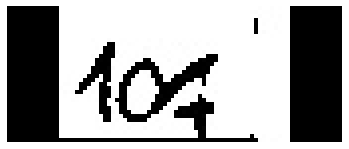

In [152]:
print('original shape in (height, width, channels):', dataset['test_images'][1].shape)
# image = cv2.resize(dataset['test_images'][1], (0,0), fx=1/2/2/2/2, fy=1/2/2/2/2)
# print(image.shape)
plt.imshow(dataset['test_images'][1], cmap='gray')
plt.axis('off')

In [107]:
# 12 is the padding character
print('Preidction', np.argmax(model.predict(dataset['test_images'][1][None, :, :, :]), axis=-1)[0])
print('Ground truth', dataset['test_targets'][1])

Preidction [ 1  0  7 12 12 12 12 12]
Ground truth [ 1  0  7 12 12 12 12 12]


In [108]:
# obtaining feature maps and attention weights
feature_maps, att_weights = model.sess.run([resnet_output, attention_tensor], {
    model.inference_input_ph: dataset['test_images'][1][None, :, :, :],
    model.is_training_ph: False
})

## Visualizing feature maps
### shape: (3, 6, 256): 3 pixels by 6 pixels, with 256 features

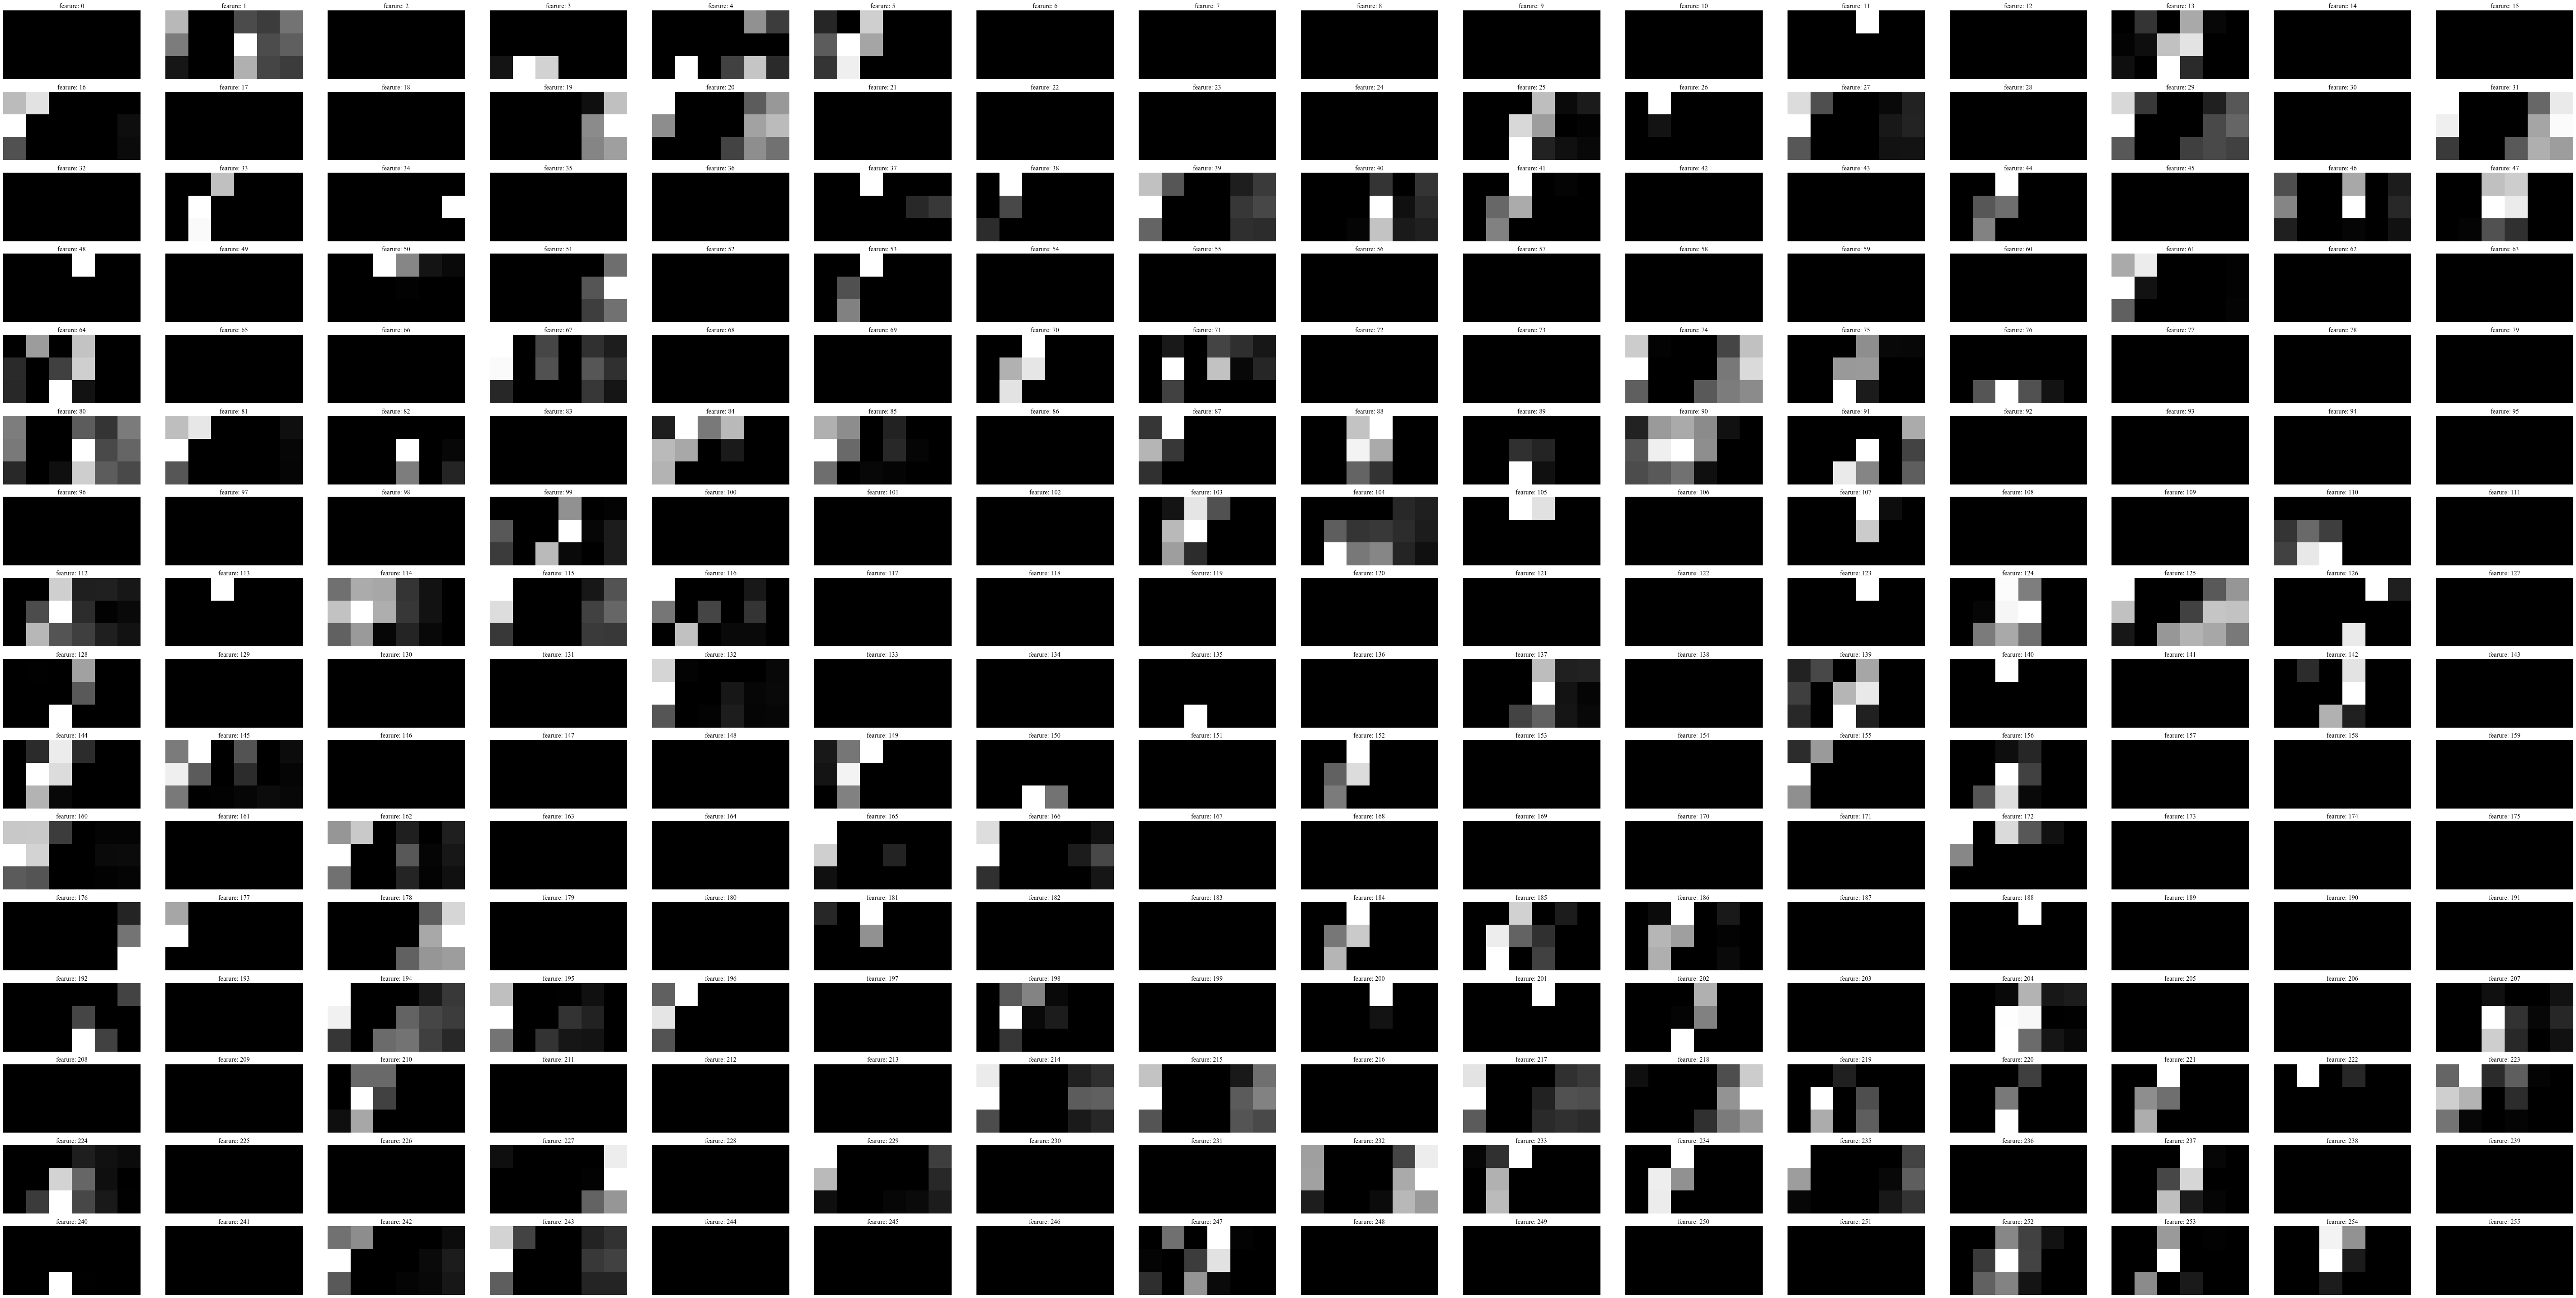

In [154]:
f, axes = plt.subplots(16, 16, figsize=(80, 40))
for i in range(feature_maps.shape[-1]):
    axes[i//16,i%16].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i//16,i%16].axis('off')
    axes[i//16,i%16].set_title('fearure: %d' % (i))
# f.subplots_adjust(hspace=-0.5, wspace=0.4)
f.tight_layout()

## ! After 4 times down-sampling, the feature maps are too small to visualize any meaningful features. Next, let's check out the attention weights

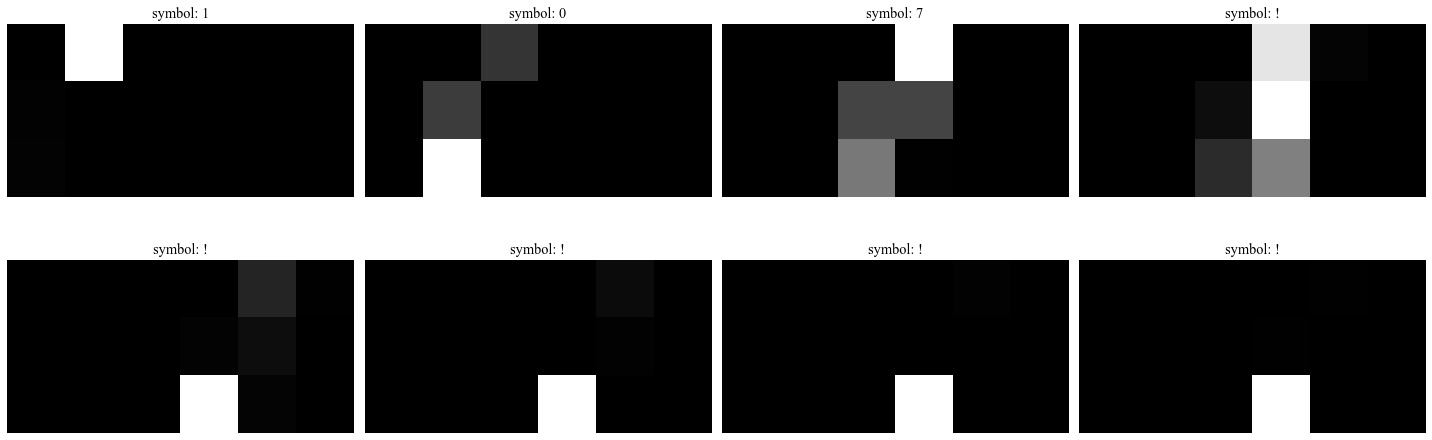

In [144]:
f, axes = plt.subplots(2, 4, figsize=(20,10))
for i in range(att_weights.shape[1]):
    axes[i//4,i%4].imshow(att_weights[0, i, :].reshape(6,3).T, cmap='gray')
    axes[i//4,i%4].axis('off')
    axes[i//4,i%4].set_title('symbol: ' + lib.dataloader.all_allowed_characters[dataset['test_targets'][1][i]])
f.subplots_adjust(hspace=-0.5, wspace=0.4)
f.tight_layout()

# Another prediction

In [103]:
print('Preidction', np.argmax(model.predict(dataset['test_images'][200][None, :, :, :]), axis=-1)[0])
print('Ground truth', dataset['test_targets'][200])

Preidction [ 4  4 12 12 12 12 12 12]
Ground truth [ 4  4 12 12 12 12 12 12]
